## Описание проекта.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Постановка задачи.

### Подготовьте данные

 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и   опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

### Проведите исследовательский анализ данных

 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Проверьте гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Задайте самостоятельно пороговое значение alpha.
 
Поясните:

 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.

### Напишите общий вывод

## Описание данных

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
Данные за 2016 год могут быть неполными.

## Общая информация 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('D:/games.csv')
    
original_data_shape = data.shape[0]

In [3]:
pd.set_option('display.max_columns', None)
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Поверим датасет на явные дубликаты:
data.duplicated().sum()

0

Изучим наименьшие годы релиза по каждой платформе в поиске аномальных значений:

In [7]:
data.pivot_table(index='Platform', values='Year_of_Release', aggfunc='min').sort_values(by='Year_of_Release')

,Year_of_Release
Platform,
2600,1980.0
NES,1983.0
DS,1985.0
PC,1985.0
GB,1988.0
SNES,1990.0
GEN,1990.0
GG,1992.0
SCD,1993.0


У платформы DS, вышедшей в середине 2000-ых не может быть игры, выпущенной в 1985 г. Очевидная ошибка в данных.

**Изучив исходные данные, имеем следующие выводы:**
1. Названия столбцов некорректны и требуют исправления;
1. Некоторые данные сохранены в неверном формате;
1. Необходио изучить пропуски в данных и по возможности их заполнить;
1. Явных дубликатов не обнаружено.
1. Замечено аномальное значение выпуска игры у платформы DS.

## Предобработка данных

### Исправление названий стобцов

Приведём все наименования столбцов к нижнему регистру:

In [8]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Заполнение пропусков

Прежде всего изучим строковые столбцы (жанры и платформы) на наличие дубликатов:

In [9]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Дубликатов не обнаружено.**

Исследуем игры без названия:

In [11]:
data.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 игры с огромным количеством пропусков. **Уместно исключить их из выборки.**

In [12]:
data = data.dropna(subset=['name'])

Не забудем так же избавиться от аномального значения в виде игры, выпущенной раньше появления консоли DS:

In [13]:
data = data.drop(data.query('(platform == "DS") & (year_of_release < 2000)').index)

Очевидно, оценка пользователей и критиков взяты с крупнейшего сайта-агрегатора Metacritic, где оценка критиков указывается в диапазоне от 0 до 100, а пользователей - от 0 до 10, с дробной частью. Однако для оценки критиков есть так же оценка "TBD" - to be discussed. Согласно часто задаваемым вопросам на самой Metacritic, такой статус оценки критиков присваивается, если игру не рассматривали  игорвые журналисты по самым разным причинам (игра слишком нишевая, не выходила не мировой рынок, жанр игры непопулярен). Исследуем уникальные значения столбца "critic_score".

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В выборке так же существует эта оценка. **Заменим "TBD" на -1, чтобы:**
- При дальнейшем анализе было очевидно, что это игра без рейтинга;
- Привести столбец к правильному (цифровому) формату, чего мы не можем сделать, если в столбце есть строки и пропуски.

In [15]:
data['user_score'] = data['user_score'].replace('tbd', -1.0)

Теперь **заполним пропуски в столбцах оценки критиков и игроков -10.** Заполнять пропуски в указанных столбцах медианными или средними значениями некорректно, т.к. игры, будучи произведенияем искусства, слишком субъективны в восприятии, чтобы пытаться присвоить им оценку, опираясь на мнение пользователей о других играх того же жанра, или выпущенных в том же году. 

**Заменим пропуски в столбце рейтинга значением "Unknown"**, поскольку это значение присваивается каждой отдельной игре, выходящей на рынки США и Канады, в частном порядке оценочной комиссией ESRB.

Оставшиеся **игры с пропусками в годе издания удалим из выборки**, поскольку нам важно проанализировать игровую индустрию в динамике, игры без определнного года выпуска не имеют в данном случае значимости.

In [16]:
data = data.dropna(subset = ['year_of_release'])
data['critic_score'] = data['critic_score'].fillna(-10)
data['user_score'] = data['user_score'].fillna(-10.0)
data['rating'] = data['rating'].fillna('Unknown')

In [17]:
# Оценим, какую долю оригинальной выборки мы удалили во врем предобработки данных:
display(f'Из генеральной выборки удалено {round(((original_data_shape / data.shape[0])*100)-100, 2)}%')
original_data_shape = data.shape[0]

'Из генеральной выборки удалено 1.65%'

**Генеральная выборка представлена практически в исходном виде.** Продолжаем предобработку.

К правильному типу данных (целочисленному) приведём столбцы с годом релиза и оценки критиков:

In [18]:
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data['year_of_release'] = data['year_of_release'].astype('int')

Для дальнейшего анализа **создадим столбец gross_sales**, в котором будут указаны валовые продажи каждой игры.

In [19]:
data['gross_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

На случай, если нам в дальнейшем понадобится чистая предобработанная выборка, сделаем копию data:

In [20]:
original_data = data.copy()

**На этом предобработка данных завершена.**

- Были проработаны:
   1. Названия столбцов;
   1. Пропуски в данных;
   1. Типы данных;


- Для более точного анализа игр по возрастной категории, пропуски в столбце rating были заменены на Unknown. 
- Принято решение не заполнять пропуски медианными или средними значениями в столбцах оценок игры критиками и игроками по причине необъективности этих методов в отношении столь субъективного явления, как искусство. Вместо этого пропуски в годах релиза, оценок игры пользователями и критиками заполнены значением -10 для возможности в дальнейшем исследовать только игры с имеющимся рейтингом.
- Всего из генеральной выборки удалено 2 строчки с играми без названий.

Возникшие пропуски могли быть следствием человеческого фактора (ошибки при заполнении), отсутствием данных либо малой популярностью игры. В выборке представлены игры, созданные в 80-ых годах прошлого века, когда игровая журналистика, как явление, ещё только зарождалась, а о сайтах-агригаторах, как Metacritic и речи не шло. 

In [21]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  gross_sales      16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Анализ данных

### Количество выпущенных игр по годам

Изучим сколько игр выпускалось в разные годы и важны ли данные за все периоды:

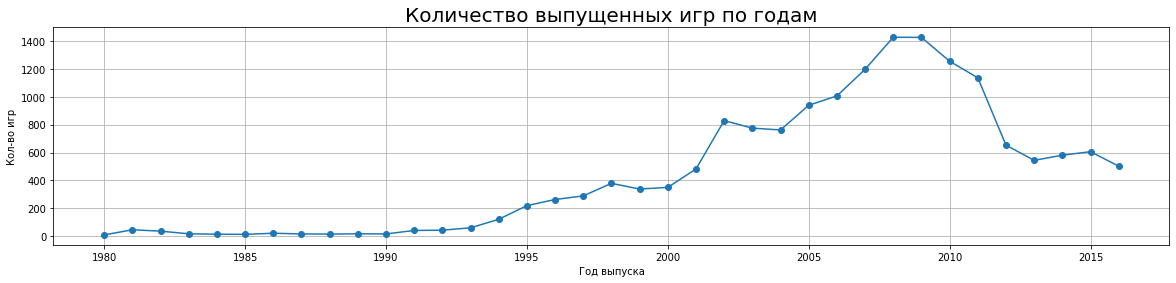

In [22]:
plt.figure(figsize=(20, 4))
plt.plot(data.query('year_of_release > 0').groupby('year_of_release')['name'].count(), 'o-')
plt.title('Количество выпущенных игр по годам', fontsize=20)
plt.ylabel('Кол-во игр')
plt.xlabel('Год выпуска')
plt.grid(True);

Очевидно, что о разработке игр, как инудстрии, целесообразно говорить **начиная с 1993 года**, когда начался заметный рост выпускаемых игр. Это связано с развитием и большей доступностью технологий, персональных копьютеров и приставок;

Наиболее проудктивными оказались 2008 и 2009 года;

Спад после 2009 года может быть следствием финансового мирового кризиса 2008 года, который повлёк за собой закрытие многих студий разработчиков;

Для дальнейшего анализа **создадим срез данных, где исключим из генеральной выборки все данные до 1993 года.**

In [23]:
data = data.query('year_of_release > 1992')
f'Удалено {original_data_shape-data.shape[0]} строк из {original_data_shape}'

'Удалено 304 строк из 16443'

### Количество выпущенных игр по платформам

Изучим как менялись продажи по платформам, чтобы выбрать платформы с наибольшими суммарными продажами. Определим за какой характерный срок появляются новые и исчезают старые платформы.

Для этого посмотрим график, на котором отобразим количество выпущенных игр для 15 наиболее популярных платформ.

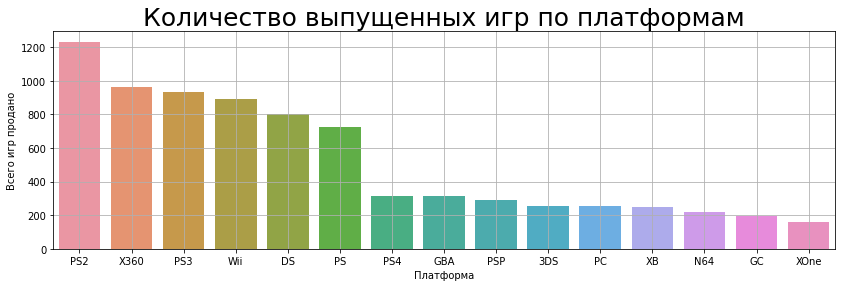

In [24]:
top15_platforms = data.groupby('platform')['gross_sales'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 4))
plt.title('Количество выпущенных игр по платформам', fontsize=25)
sbn.barplot(y=top15_platforms, x=top15_platforms.index)
plt.ylabel('Всего игр продано')
plt.xlabel('Платформа')
plt.grid(True);

### Срок появления и исчезновения новых платформ

Посчитаем среднюю продолжительность "жизни" каждой платфоры. Для это сперва создадим датафрейм, где в абсолютных величинах отобразим разницу между годами выпусков первой и последней игр для каждой из 15 платформ.

In [25]:
platform_life_cycle_lib = {}
for platform in top15_platforms.index:
    platform_data = original_data.query('(year_of_release > 0) & (platform == @platform)')
    platform_life_cycle_lib[platform] = platform_data['year_of_release'].max() - platform_data['year_of_release'].min()

top_platforms_life_years = pd.DataFrame(
    platform_life_cycle_lib.values(), 
    platform_life_cycle_lib.keys(), 
    columns=['life_years']).sort_values(by='life_years', ascending=False)

top_platforms_life_years

,life_years
PC,31
PS2,11
X360,11
PSP,11
PS3,10
Wii,10
DS,9
PS,9
XB,8
GBA,7


Для более адекватной оценки из датафрейма стоит исключить: 
- ПК, поскольку это первостепенно не игровая платформа, а рабочий инструмент;
- PS4 с XboxOne, т.к. на момент 2017 года, когда у нас заканчиваются данные, эти платформы всё ещё были актуальны. 

Оценим среднюю продолжительность жизни игровых консолей:

In [26]:
top_platforms_life_years.drop(['PC', 'XOne', 'PS4'])
top_platforms_life_years = sum(top_platforms_life_years['life_years']) / len(top_platforms_life_years)
f'Средняя продолжительность жизни консоли - {round(top_platforms_life_years, 1)} лет'

'Средняя продолжительность жизни консоли - 9.3 лет'

### Лидеры продаж

Выделим из наших топ 15 платформ пятёрку платформ с наибольшим количеством выпущенных игр.

In [27]:
most_popular_platforms = data.groupby('platform').agg({'name':'count'})
most_popular_platforms = most_popular_platforms.sort_values(by='name', ascending=False).head()
most_popular_platforms

,name
platform,
PS2,2127
DS,2120
PS3,1306
Wii,1286
X360,1232


Лидерами оказались PlayStation 2 и Nintendo DS с разницей всего в 7 наименований. Неудевительно, ведь эти притавки прославились наибольшими сроками поддержки и до сих пор любимы многими.

Оценим количество продаж в каждый год:

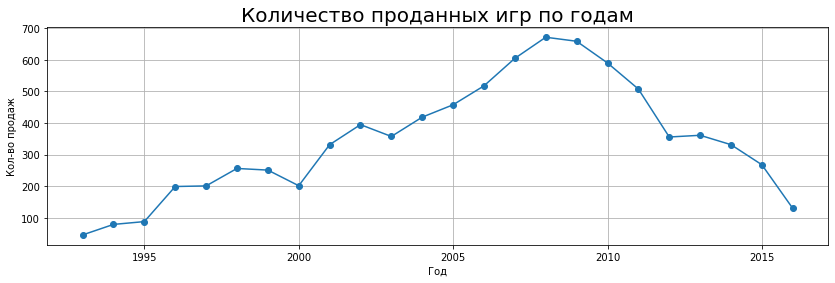

In [28]:
plt.figure(figsize=(14, 4))
plt.plot(data.query('year_of_release > 0').groupby('year_of_release').agg({'gross_sales':'sum'}), 'o-')
plt.title('Количество проданных игр по годам', fontsize=20)
plt.ylabel('Кол-во продаж')
plt.xlabel('Год')
plt.grid(True);

График с редкими исключениями похож на оный по количеству изданых игр, что логично.

Рассмотрим количество продажи по платформам с 2011 по 2016 года, чтобы иметь представление о том, что ждало актуальные на тот момент платформы.

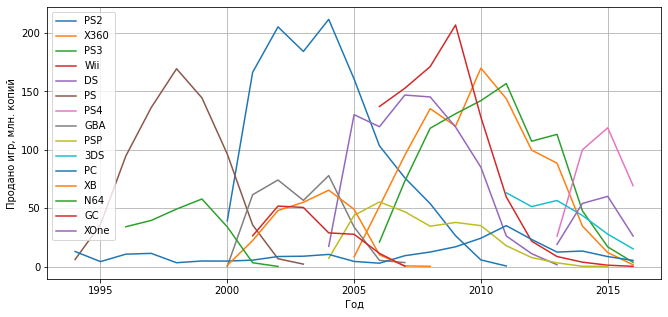

In [29]:
for platform in top15_platforms.index.to_list():   
    temp_data = (data.query('(platform == @platform) & (year_of_release > 0)')
                .pivot_table(index='year_of_release', values ='gross_sales', aggfunc='sum')
               )
    temp_data = temp_data.rename(columns = {'gross_sales': platform})
    temp_data[platform].plot(legend=True, grid=True, figsize=(11, 5), ylabel='Продано игр, млн. копий', xlabel='Год')

У большинства консолей график продаж похож на график нормального распределения. С уверенностью можно утверждать, что на всех платформах, актуальных к концу 2010-ых годов, замечено снижение продаж после 2011 года. Наиболее прибыльными консолями за изучаемый период оказались PS, PS2, Wii и Xbox.

С этого момента сократим наш срез ещё больше - с начала 2013 по 2016 года, чтобы анализировать наиболее актуальные данные. Вычленим из выборки самые перспективные платформы, которые на рынке относительно недавно (с 2011 года) и построим ещё один график.

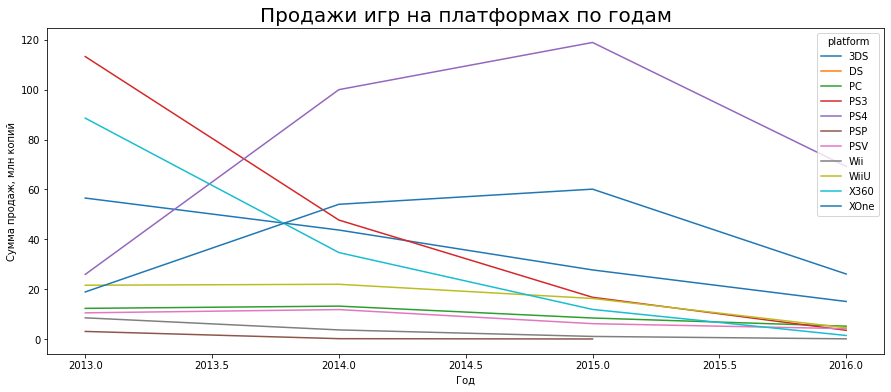

In [30]:
actual_data = data.query('year_of_release > 2012')
actual_platforms_data = actual_data.pivot_table(index=['platform', 'year_of_release'], values=['gross_sales'], aggfunc=['sum'])
actual_platforms_data = actual_platforms_data.reset_index(level='year_of_release')
actual_platforms_data.columns = ['year', 'gross_sales']
actual_platforms_data = actual_platforms_data.reset_index()
actual_platforms_data = actual_platforms_data.pivot(index='year', columns='platform', values='gross_sales')

fig, ax = plt.subplots()
actual_platforms_data.plot(figsize=(15,6), ax=ax)
ax.set_title('Продажи игр на платформах по годам', fontsize=20)
ax.set_xlabel('Год')
ax.set_ylabel('Сумма продаж, млн копий');

С 2013 на 2014 год наблюдается смена поколений консолей: PS3 передаёт эстафету первенства PS4, а Хbox360 - XboxOne. Спад продаж в 2016 году скорее всего является необъективным представлением реальности, посколько в генеральной выборке представлена не вся информация за этого год. 

Построим графики с усами для валовых продаж за ислледуемый срок и отдельно для каждой актуальной на конец 2015 года платформы:

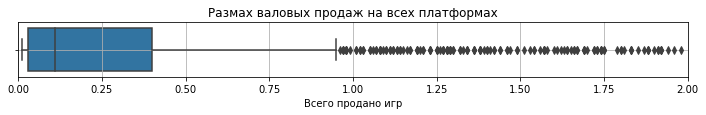

In [31]:
plt.figure(figsize=(12, 1))
plt.xlim(0, 2)
plt.title('Размах валовых продаж на всех платформах', fontsize=12)
sbn.boxplot(x='gross_sales', data=actual_data)
plt.xlabel('Всего продано игр')
plt.grid(True);

Можно утверждать, что в среднем игры расходятся тиражом ~80 тыс. копий. Однако продажи больше 800 тыс. уже можно считать аномальными, т.к. они выходят за третий квартиль выборки. 

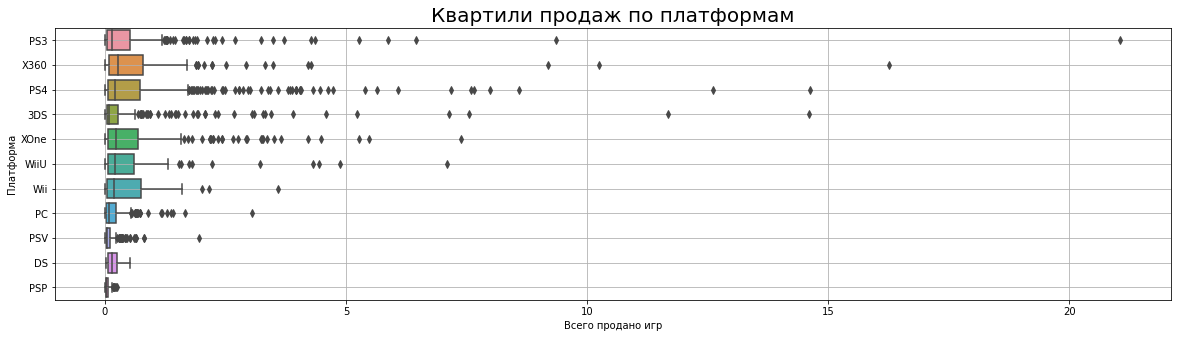

In [32]:
plt.figure(figsize=(20, 5))
plt.title('Квартили продаж по платформам', fontsize=20)
sbn.boxplot(x='gross_sales', y='platform', data=actual_data)
plt.ylabel('Платформа')
plt.xlabel('Всего продано игр')
plt.grid(True);

Получили очередное подтверждение, что приставки производства PS и Xbox являются лидерами продаж с выдающиися предельными показатлями. Вероятно, по персональным компьютерам в выборке собрано недостаточно информации, поскольку столь сильного отставания у этой платформы на фоне игровых консолей быть не должно. 

Более детально изучим диаграмы размаха для наиболее коммерчески перспективных платформ: Xbox 360, Xbox One, PlayStation 4, Nintendo 3DS.

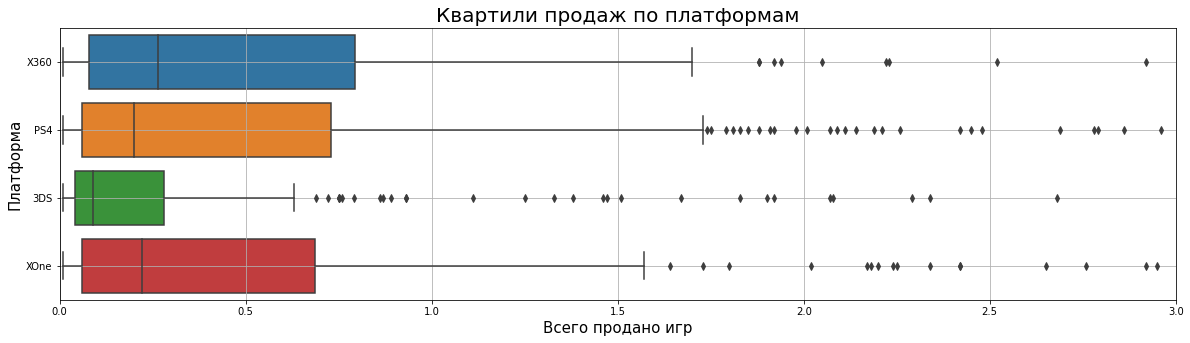

In [33]:
top_actual_platforms_list = ['3DS', 'XOne', 'PS4', 'X360']
top_actual_platforms_data = actual_data[actual_data['platform'].isin(top_actual_platforms_list)]

plt.figure(figsize=(20, 5))
plt.xlim(0, 3)
plt.title('Квартили продаж по платформам', fontsize=20)
sbn.boxplot(x='gross_sales', y='platform', data=top_actual_platforms_data)
plt.ylabel('Платформа', fontsize=15)
plt.xlabel('Всего продано игр', fontsize=15)
plt.grid(True);

На консолях нового поколения половина от выборки игр продались тиражом от ~10 тыс. до 600 тыс. копий (в среднем около 150 тыс. копий). А у уходящей к 2016 году на покой Xbox 360 средние показатели продаж и того больше.

### Влияние отзывов на продажи

Оценим влияние на продажи отзывов пользователей и критиков на ряд флагмансих консолей. Для этого отобразим корреляции оценок пользователей и критиков с валовыми продажами, а потом построим диаграммы рассеивания для каждой платформы:

In [34]:
# Комментарий ревьюера
print(len(actual_data.query('user_score > 0')))
print(len(actual_data.query('critic_score > 0')))
print(len(actual_data.query('(user_score > 0) & (critic_score > 0)')))

1192
991
976


In [35]:
top_actual_platforms_list.sort()

In [36]:
original_data.year_of_release.min()

1980

'График корреляции для 3DS'

,gross_sales,user_score,critic_score
gross_sales,1.000000,0.007941,0.058387
user_score,0.007941,1.000000,0.852357
critic_score,0.058387,0.852357,1.000000


'График корреляции для PS4'

,gross_sales,user_score,critic_score
gross_sales,1.000000,0.118277,0.218256
user_score,0.118277,1.000000,0.923325
critic_score,0.218256,0.923325,1.000000


'График корреляции для X360'

,gross_sales,user_score,critic_score
gross_sales,1.000000,0.060633,0.238063
user_score,0.060633,1.000000,0.495359
critic_score,0.238063,0.495359,1.000000


'График корреляции для XOne'

,gross_sales,user_score,critic_score
gross_sales,1.000000,0.114258,0.265179
user_score,0.114258,1.000000,0.790094
critic_score,0.265179,0.790094,1.000000


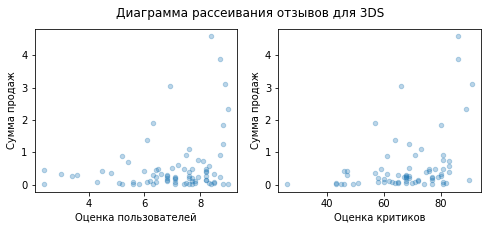

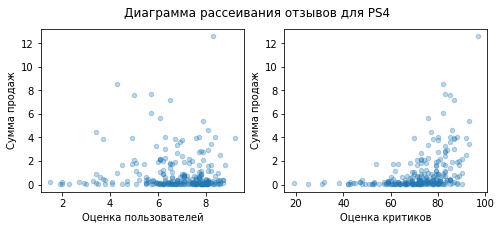

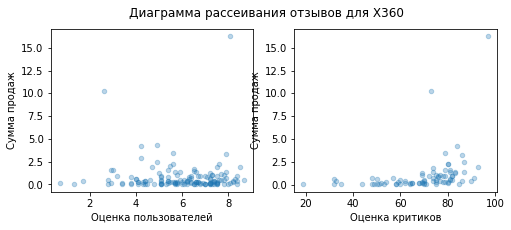

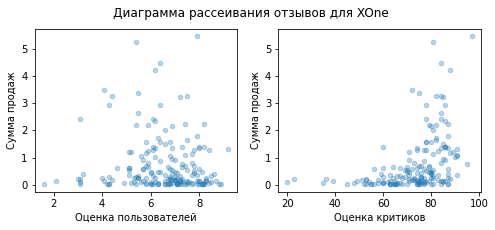

In [37]:
for platform in top_actual_platforms_list:
    fig, ax = plt.subplots(1, 2)
    temp_data = actual_data.loc[actual_data['platform'] == platform]
    temp_data.query('user_score > 0').plot(x='user_score', y='gross_sales', kind='scatter', ax=ax[0], figsize=(8,3), alpha = 0.3)
    temp_data.query('critic_score > 0').plot(x='critic_score', y='gross_sales', kind='scatter', ax=ax[1], figsize=(8,3), alpha = 0.3)
    fig.suptitle(f'Диаграмма рассеивания отзывов для {platform}')

    ax[0].set_xlabel('Оценка пользователей')
    ax[0].set_ylabel('Сумма продаж')
    ax[1].set_xlabel('Оценка критиков')
    ax[1].set_ylabel('Сумма продаж');
    
    display(f'График корреляции для {platform}')
    display(temp_data[['gross_sales', 'user_score', 'critic_score']].corr())

Замечена возможная зависимость между отзывами критиков и суммой продаж. Для наглядности построим матрицу корреляций:

Наибольшие кореляции из всех платформ составили:
- **26% от оценок критиков;**
- **11% от оценок игроков.**

Можно с уверенностью утверждать, что **оценки критиков оказывают малое влияние на продажу, в то время, как оценки игроков никак не влияют на продажи.**

Выделим наиболее популярные жанры с 2013 по 2016 года:

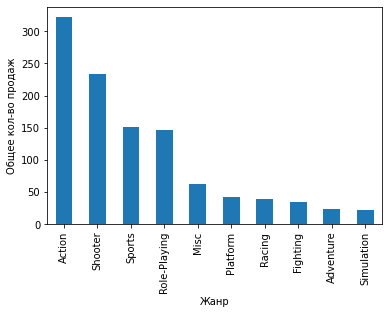

In [38]:
genre_sales = actual_data.groupby('genre')['gross_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', y='gross_sales', x='genre', xlabel='Жанр', ylabel='Общее кол-во продаж')

В четвёрку самых популярных жанров по всему миру входят:
1. Экшены;
1. Шутеры;
1. Спортивные симуляторы;
1. РПГ.

Теперь построим график, на котором отобразим медианные значения продаж по каждому жанру:

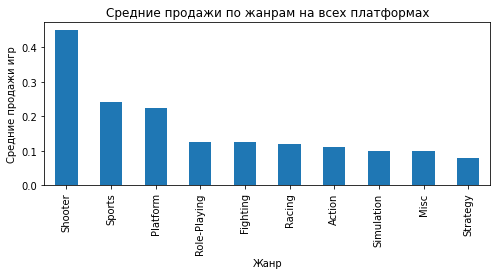

In [39]:
genre_sales_median = actual_data.groupby('genre')['gross_sales'].median().sort_values(ascending=False).head(10)
genre_sales_median.plot(kind='bar', 
                          ylabel='Средние продажи игр', 
                          xlabel='Жанр', 
                          title='Средние продажи по жанрам на всех платформах',
                          figsize=(8, 3));

Или в виде диаграммы размаха:

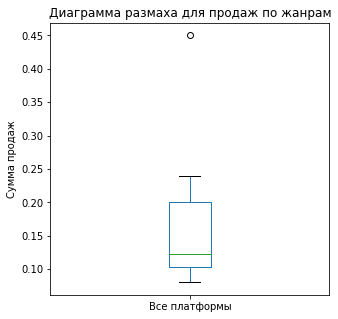

In [40]:
data_for_plot = pd.DataFrame({'Все платформы':genre_sales_median})
ax = plt.subplot()
data_for_plot.plot(kind='box', figsize=(5, 5), ax=ax)
ax.set_title('Диаграмма размаха для продаж по жанрам', fontsize=12)
ax.set_ylabel('Сумма продаж');

**Наиболее прибыльнымы являются игры в жанре шутер**, но так же целесообразно вкладываться в игры-платформеры и спортивные симуляторы. Экшены, хоть и являются лидерами по абсолютным показтелям продаж, уступают остальным жанрам по средним продажам.

## Портрет пользователя каждого региона

Сперва изучим востребованность консолей в актуальном временном отрезке по отношению к трём иследуемым регионам:

In [41]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  gross_sales      16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


Рассмотрим наиболее популярные жанры в каждой из географических зон. Для этого добавим в каждый из срезов по регионам строку "Others", содержащую сумму платформ, не вшедших в топ-5 в регионе.

In [42]:
jp_fav_platforms = actual_data.groupby(by='platform')\
.agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales')

temp = jp_fav_platforms[-5:].copy()

new_row = pd.DataFrame(
    [[jp_fav_platforms['jp_sales'][:-5].sum()]],
    columns=['jp_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

jp_fav_platforms_for_plot = pd.concat([temp, new_row])

In [43]:
eu_fav_platforms = actual_data.groupby(by='platform')\
.agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales')

temp = eu_fav_platforms[-5:].copy()

new_row = pd.DataFrame(
    [[eu_fav_platforms['eu_sales'][:-5].sum()]],
    columns=['eu_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

eu_fav_platforms_for_plot = pd.concat([temp, new_row])

In [44]:
na_fav_platforms = actual_data.groupby(by='platform')\
.agg({'na_sales':'sum'})\
.sort_values(by='na_sales')

temp = na_fav_platforms[-5:].copy()

new_row = pd.DataFrame(
    [[na_fav_platforms['na_sales'][:-5].sum()]],
    columns=['na_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

na_fav_platforms_for_plot = pd.concat([temp, new_row])

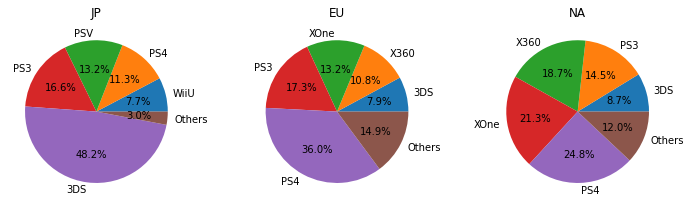

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].pie(jp_fav_platforms_for_plot['jp_sales'], 
          autopct='%.1f%%',
          labels=jp_fav_platforms_for_plot.index)
ax[1].pie(eu_fav_platforms_for_plot['eu_sales'], 
          autopct='%.1f%%',
          labels=eu_fav_platforms_for_plot.index)
ax[2].pie(na_fav_platforms_for_plot['na_sales'], 
          autopct='%.1f%%',
          labels=na_fav_platforms_for_plot.index)

ax[0].set_title('JP')
ax[1].set_title('EU')
ax[2].set_title('NA')

fig.tight_layout()
plt.show();

In [46]:
jp_fav_genres = actual_data.groupby(by='genre')\
.agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales')

temp = jp_fav_genres[-5:].copy()

new_row = pd.DataFrame(
    [[jp_fav_genres['jp_sales'][:-5].sum()]],
    columns=['jp_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

jp_fav_genres_for_plot = pd.concat([temp, new_row])

In [47]:
eu_fav_genres = actual_data.groupby(by='genre')\
.agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales')

temp = eu_fav_genres[-5:].copy()

new_row = pd.DataFrame(
    [[eu_fav_genres['eu_sales'][:-5].sum()]],
    columns=['eu_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

eu_fav_genres_for_plot = pd.concat([temp, new_row])

In [48]:
na_fav_genres = actual_data.groupby(by='genre')\
.agg({'na_sales':'sum'})\
.sort_values(by='na_sales')

temp = na_fav_genres[-5:].copy()

new_row = pd.DataFrame(
    [[na_fav_genres['na_sales'][:-5].sum()]],
    columns=['na_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

na_fav_genres_for_plot = pd.concat([temp, new_row])

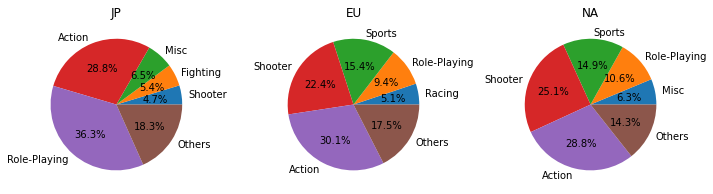

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].pie(jp_fav_genres_for_plot['jp_sales'], 
          autopct='%.1f%%',
          labels=jp_fav_genres_for_plot.index)
ax[1].pie(eu_fav_genres_for_plot['eu_sales'], 
          autopct='%.1f%%',
          labels=eu_fav_genres_for_plot.index)
ax[2].pie(na_fav_genres_for_plot['na_sales'], 
          autopct='%.1f%%',
          labels=na_fav_genres_for_plot.index)

ax[0].set_title('JP')
ax[1].set_title('EU')
ax[2].set_title('NA')

fig.tight_layout()
plt.show();

И наконец, изучим влияние рейтинга незамисымых оценочных ведомств на количество продаж в регионах:

In [50]:
jp_rating = actual_data.groupby(by='rating')\
.agg({'jp_sales':'sum'})\
.sort_values(by='jp_sales')

temp = jp_rating[-5:].copy()

new_row = pd.DataFrame(
    [[jp_rating['jp_sales'][:-5].sum()]],
    columns=['jp_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

jp_rating_for_plot = pd.concat([temp, new_row])

In [51]:
eu_rating = actual_data.groupby(by='rating')\
.agg({'eu_sales':'sum'})\
.sort_values(by='eu_sales')

temp = eu_rating[-5:].copy()

new_row = pd.DataFrame(
    [[eu_rating['eu_sales'][:-5].sum()]],
    columns=['eu_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

eu_rating_for_plot = pd.concat([temp, new_row])

In [52]:
na_rating = actual_data.groupby(by='rating')\
.agg({'na_sales':'sum'})\
.sort_values(by='na_sales')

temp = na_rating[-5:].copy()

new_row = pd.DataFrame(
    [[na_rating['na_sales'][:-5].sum()]],
    columns=['na_sales']
)
new_row.rename(index={0:'Others'}, inplace=True)

na_rating_for_plot = pd.concat([temp, new_row])

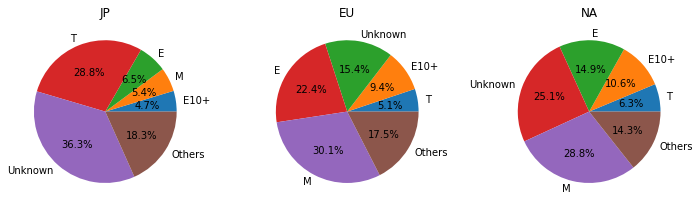

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].pie(jp_fav_genres_for_plot['jp_sales'], 
          autopct='%.1f%%',
          labels=jp_rating_for_plot.index)
ax[1].pie(eu_fav_genres_for_plot['eu_sales'], 
          autopct='%.1f%%',
          labels=eu_rating_for_plot.index)
ax[2].pie(na_fav_genres_for_plot['na_sales'], 
          autopct='%.1f%%',
          labels=na_rating_for_plot.index)

ax[0].set_title('JP')
ax[1].set_title('EU')
ax[2].set_title('NA')

fig.tight_layout()
plt.show();

**Выводы:**

Для Японии характерны:
- Предпочтение отечественных игровых платформ (Nintendo, PlayStation);
- Чрезмерное увлечение играми жанра РПГ на фоне всеъ остальных;
- За исключение игр без рейтингаЮ на рынке доминируют игры категорий "для всех"(10+).

Для Европы характерны:
- Предпочтение платформам компании PlaySation;
- Любовь к играм жанров Экшн, шутер и спортивные симуляторы;
- Игры категории "для взрослых" (17+), "для всех" (10+)  и "для подростков" (13+)

Для Америки харакетрны:
- Предпочтение отечственному Xbox;
- В играх вкусы идентичны европейцам;
- Четверть рынка не была оценена ESRB, высока поплуярность категории "для взрослых" (17+).

Стоит отметить, что рейтинговая система ESRB не распространяется на рынки Европы и Японии, так что целесообразно игнорировать рейтинг "Unknown" в этих регионах.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC неравны.

Убедимся, что можно использовать t-Стьюдента:

In [54]:
PC_ratings = actual_data.query('(platform == "PC") & (user_score > 0)')['user_score']
XOne_ratings = actual_data.query('(platform == "XOne") & (user_score > 0)')['user_score']

In [55]:
display(f'PC count: {PC_ratings.count()}')
display(f'XboxOne count: {XOne_ratings.count()}')

'PC count: 155'

'XboxOne count: 182'

Укажем equal_var = False, поскольку дисперсии выборок различаются.

In [56]:
alpha = 0.05

results = st.ttest_ind(PC_ratings, XOne_ratings, equal_var=False)

display(f'p-значение: {results.pvalue}')

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнать нулевую гипотезу")

'p-значение: 0.14759594013430463'

Нет оснований отвергнать нулевую гипотезу


**Средние пользовательские рейтинги платформ Xbox One и PC равны.**

### Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотеза H0: средний пользовательский рейтинг жанров Action и Sports равны.

Гипотеза H1: средний пользовательский рейтинг жанров Action и Sports неравны.

По аналогии проверим возможность использования t-Стьюдента:

In [57]:
action_scores = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sports_scores = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']

display(f'ACtion count: {action_scores.count()}')
display(f'Sports count: {sports_scores.count()}')

'ACtion count: 389'

'Sports count: 160'

Всё ещё equal_var=False.

In [58]:
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

display(f'p-значение: {results.pvalue}')

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнать нулевую гипотезу")

'p-значение: 1.4460039700704315e-20'

Отвергаем нулевую гипотезу


На основании имеющихся данных, на уровне значимости 5%, есть основания **отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.**

Выведем средние и медианные показатели пользвательских рейтингов для жанров и платформ, чтобы убедиться в правоте расчётов:

In [59]:
xone_data = actual_data.query('platform == "XOne"')
pc_data = actual_data.query('platform == "PC"')
actions_data = actual_data.query('genre == "Action"')
sports_data = actual_data.query('genre == "Sports"')

In [60]:
display(f'Арифм. среднее пользовательских оценок для игр на XOne: {xone_data["user_score"].mean()}')
display(f'Арифм. среднее пользовательских оценок для игр на PC: {pc_data["user_score"].mean()}')
display('__________________________________________________________________________')
display(f'Медиана пользовательских оценок для игр на XOne: {xone_data["user_score"].median()}')
display(f'Медиана пользовательских оценок для игр на PC: {pc_data["user_score"].median()}')

'Арифм. среднее пользовательских оценок для игр на XOne: 2.5744939271255056'

'Арифм. среднее пользовательских оценок для игр на PC: 3.5809523809523807'

'__________________________________________________________________________'

'Медиана пользовательских оценок для игр на XOne: 6.0'

'Медиана пользовательских оценок для игр на PC: 6.0'

Действительно, **медианы пользовательских оценок игра на PC и Xbox One идентичны**

In [61]:
display(f'Арифм. среднее пользовательских оценок для жанра Action: {actions_data["user_score"].mean()}')
display(f'Арифм. среднее пользовательских оценок для жанра Sport: {sports_data["user_score"].mean()}')
display('__________________________________________________________________________')
display(f'Медиана пользовательских оценок для жанра Action: {actions_data["user_score"].median()}')
display(f'Медиана пользовательских оценок для жанра Sport: {sports_data["user_score"].median()}')

'Арифм. среднее пользовательских оценок для жанра Action: -0.9441253263707571'

'Арифм. среднее пользовательских оценок для жанра Sport: 1.9397196261682244'

'__________________________________________________________________________'

'Медиана пользовательских оценок для жанра Action: 2.9'

'Медиана пользовательских оценок для жанра Sport: 4.35'

**Средние показатели пользовательских оценок ислледуемых жанров сильно отличаются.**

Нами были выдвинуты две гипотезы относительно схожести пользователських рейтингов двух игровых платформ и двух наиболее популярных жанров игр.

Нулевая гипотеза – это основное проверяемое предположение, которое обычно формулируется как отсутствие различий, отсутствие влияния фактора, отсутствие эффекта, равенство нулю значений выборочных характеристик и т. п. В нашем случае предпологалось, что пользовательские оценки между исследуемыми жанрами (платформами) равны.

Альтернативная гипотеза — это та, в которую вы бы поверили, если бы нулевая гипотеза оказалась неверной. Другими словами, мы создадим утверждение (нулевая гипотеза) и используем пример данных, чтобы проверить, является ли утверждение действительным.

Поскольку гипотеза - есть предположение, её невозможно подтвердить, а можно только найти основания для того, чтобы гипотезу опровергнуть, как и случилось с гипотезой о схожести оценок жанров.

Для определения статистической значимости используется T-критерий Стьюдента. Он может применяться как в случаях сравнения независимых выборок (что и было нужно нам при работе со срезами с разными величинами), так и при сравнении связанных совокупностей.

## Выводы

- Разработка игр, как инудстрия, начала набирать значительных оборотов в 1993 году, благодаря развитию и доступности технологий, персональных копьютеров и приставок;
- Наиболее проудктивными годами для геймдева были 2008 и 2009 года;
- После 2009 года наблюдается спад производства, что может быть следствием финансового мирового кризиса 2008 года, который повлёк за собой закрытие многих студий разработчиков;
- С 2013 на 2014 год произошла смена поколений консолей: PS3 передала эстафету первенства PS4, а Хbox360 - XboxOne. Ввиду неполноты данных за 2016 сложно судить о количестве впущенных и проданных игр на консолях нового поколения, однако обе консоли являются беспрецедентными лидерами для своего времени по количеству продоваемых игр;
- Оценки критиков имеют незначительное влияние на темпы продаж игр, в то время, когда пользователи практически не влияют на продажи;


- Анализ трёх рынков (американского, европейского и японского) показал следующие результаты:
    1. Для Японии характерны:
        - Предпочтение отечественных игровых платформ (Nintendo, PlayStation);
        - Чрезмерное увлечение играми жанра РПГ на фоне всех остальных;
        - Доминирование на рынке игр категорий "для всех"(10+) и "для подростков" (13+)

    2. Для Европы характерны:
        - Предпочтение платформам компании PlaySation;
        - Любовь к играм жанров экшн, шутер и спортивные симуляторы;
        - Игры категории "для взрослых" (17+), "для всех" (10+) и "для подростков" (13+)

    2. Для Америки харакетрны:
        - Предпочтение отечственному Xbox;
        - В играх и их категориях вкусы идентичны европейцам;
        
        
- Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC равны не опровергнута;
- Гипотеза, что средние пользовательские рейтинги жанров Action и Sports различаются опровергнута.

Наиболее перспективными направлениями инвестиций являются:
1. **Отечественные платформы на японском рынке. Игры в жанре РПГ и экшен для подростков;**
1. **Консоли производства PlayStation для европейского рынка. Игры жанров шутер и экшен, категорий "для всех" (10+) и "для взрослых" (17+);**
1. **Платформы производства Microsoft на американском рынке. Игры в жанре шутер и экшен, категории "для взрослых" (17+);**

При этом не стоит обращать внимание на пользовательские оценки в выборе объекта инвестиции, но положительные оценки критиков с небольшой вероятностью могут положительно сказаться на продажах.